In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Newton's fractal.

(3 дополнительных балла)

Consider the equation
$$ x^3 = 1 $$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. Color the grid in three colors, according to the root, to which iterations converged.


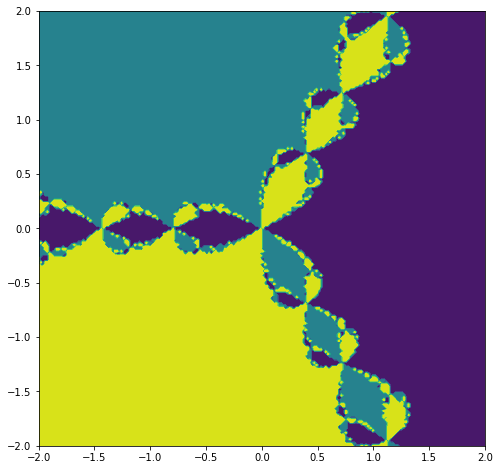

In [10]:
def test5(x):
    return x**3 - 1

def test5der(x):
    return 3*x**2

roots=np.exp(np.arange(0,3)*2*np.pi*1j/3)

initial_real=np.linspace(-2,2,200)
initial_imag=np.linspace(-2,2,200)

XR, YR = np.meshgrid(initial_real,initial_imag)
initial = XR + 1j*YR
results = np.zeros_like(initial, dtype=float)

for i in range(np.shape(results.shape[0]):
    for j in range(np.shape(results)[1]):
        find_root = abs(roots - newton_iteration(test5, test5der, initial[i,j], maxiter=10)[0])
        results[i,j] = np.argmin(find_root)

fig, ax1 = plt.subplots(figsize=(8, 8))
h = plt.contourf(XR, YR, results)
plt.show()

In [4]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона, начиная с x0.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 1000).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    ###BEGIN SOLUTION
    it = 0
    x = x0
    while abs(f(x)) > eps and it < maxiter:
        x = x - f(x)/fder(x)
        it + =1
    return x, it
    ###END SOLUTION